# 🐬 Watkins Marine Mammal Sound Database

In this Notebook, we use the Deep Learning library FastAI to classify marine animal sounds. The audio files were downloaded 

Note: For this proof-of-concept notebook, only five species were sampled: Killer Whale, Spinner Dolphin, Harp Seal, Walrus, and Narwhal.

Credit: Watkins Marine Mammal Sound Database, Woods Hole Oceanographic Institution and the New Bedford Whaling Museum

URL: https://whoicf2.whoi.edu/science/B/whalesounds/index.cfm

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from pathlib import Path
import os

from fastai.vision.all import *
from scipy import signal
from scipy.io import wavfile
import skimage as ski

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 🏗️ Setup

In [2]:
path = Path("/kaggle/input/watkins")
os.listdir(path)

['audio', 'thumbnails', 'spectograms']

In [3]:
os.listdir(path/"spectograms")

['Killer Whale', 'Harp Seal', 'Narwhal', 'Spinner Dolphin', 'Walrus']

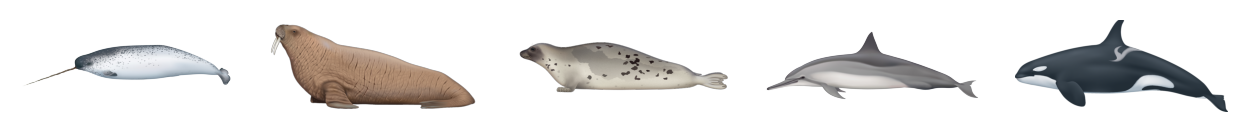

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=5, dpi=200)
for i, filename in enumerate(os.listdir(path/"thumbnails")):
    image_data = ski.io.imread(path/"thumbnails"/filename)
    axs[i].imshow(image_data)
    axs[i].axis("off")

plt.tight_layout()
plt.savefig("lineup.png")
plt.show()

### 🔭 Load Data

In [5]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(256))

dls = dblock.dataloaders(path/"spectograms")

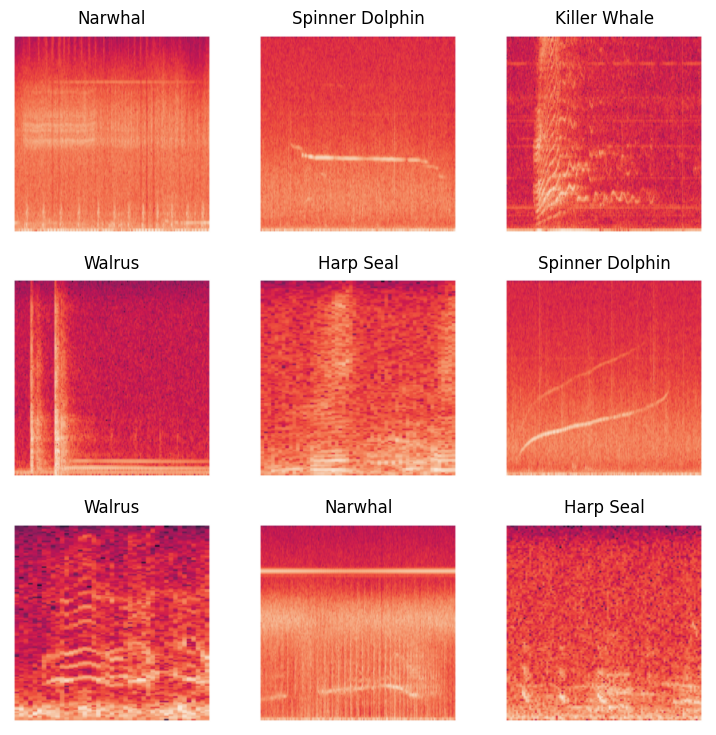

In [6]:
dls.show_batch()

### 🤖 Train Model

In [7]:
avg = 'macro'
learn = vision_learner(dls, resnet34, metrics=[F1Score(average=avg), Recall(average=avg), Precision(average=avg), accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 227MB/s]


SuggestedLRs(valley=0.0008317637839354575)

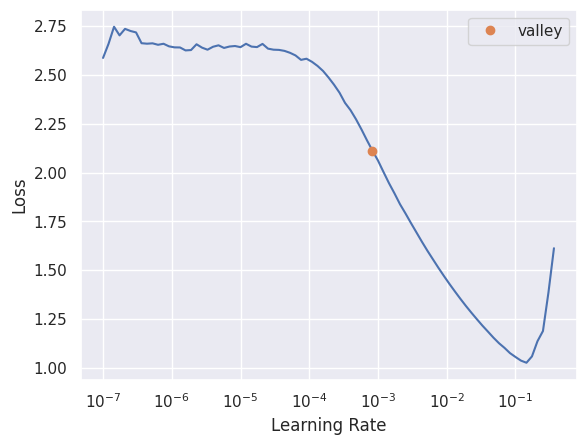

In [8]:
learn.lr_find()

In [9]:
learn.fine_tune(10, 8.3e-4)

epoch,train_loss,valid_loss,f1_score,recall_score,precision_score,accuracy,error_rate,time
0,2.763711,3.188699,0.129605,0.220000,0.092208,0.236842,0.763158,00:06


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch,train_loss,valid_loss,f1_score,recall_score,precision_score,accuracy,error_rate,time
0,2.286092,2.549454,0.140308,0.240000,0.105000,0.236842,0.763158,00:06
1,1.958290,1.992728,0.129487,0.220000,0.100000,0.210526,0.789474,00:05
2,1.628100,1.520004,0.303419,0.310556,0.369242,0.315789,0.684211,00:05
3,1.330517,1.165433,0.550000,0.565556,0.636616,0.552632,0.447368,00:05
4,1.111502,0.846419,0.750023,0.761667,0.780519,0.736842,0.263158,00:06
5,0.938328,0.609739,0.808200,0.808889,0.825873,0.789474,0.210526,00:05
6,0.805618,0.484357,0.835023,0.842222,0.841558,0.815789,0.184211,00:05
7,0.708094,0.426636,0.860224,0.864444,0.871429,0.842105,0.157895,00:05
8,0.628296,0.419055,0.882222,0.884444,0.887121,0.868421,0.131579,00:05
9,0.564499,0.445155,0.853552,0.859444,0.863312,0.842105,0.157895,00:05


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
learn.export()

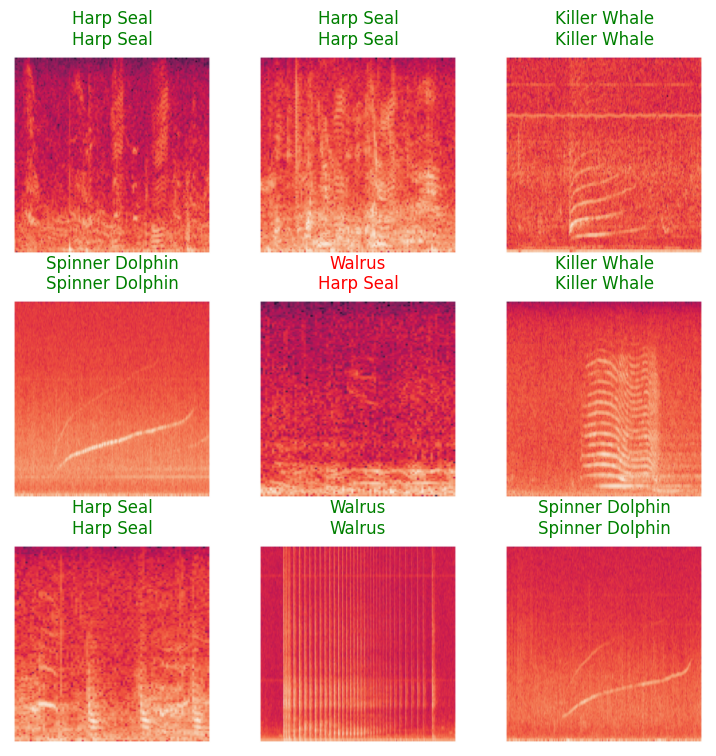

In [11]:
learn.show_results()

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


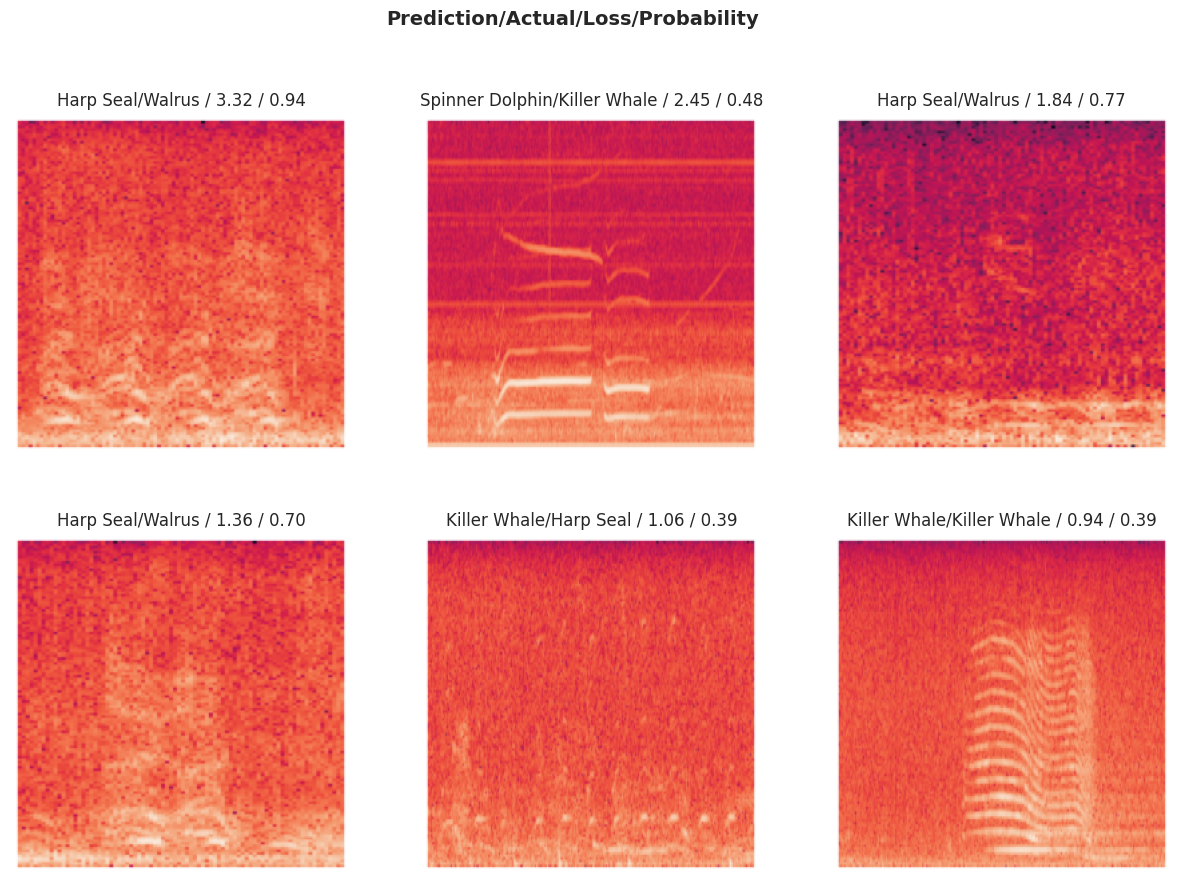

In [12]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(6, figsize=(15,10))

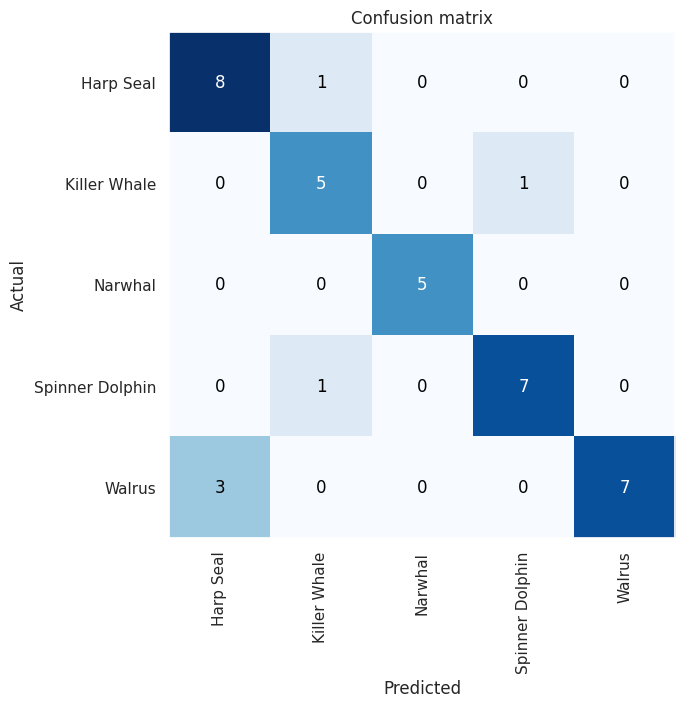

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix(figsize=(7,7))